In [1]:
from os import listdir
from os.path import isfile, join

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.style.use('default')

from sympy import *
from api.color_scheme import *

save_plot = True

random_state = 0
random.seed(random_state)
np.random.seed(random_state)

In [2]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]
random.shuffle(res_files)

In [3]:
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin']
np_lib = ['exp', 'log', 'sqrt', 'tanh', 'sin']

v = symbols('v')

In [4]:
data = 'non-linear'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'

In [5]:
# df_summary = {}
# 
# df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])
# 
# col_clean = []  # used to enable single variable in function
# for i in range(df_temp.shape[1] - 1, 0, -1):
#     col_clean.append('x_{}'.format(i))
# 
# col = []  # initialize feature names
# for i in range(1, df_temp.shape[1]):
#     col.append('x_{}'.format(i))
# col.append('pred')
# 
# for var in col[:-1]:  # enumerate all feature names
#     
#     # get min and max of inputs and outputs
#     x_lim_lower, x_lim_upper = 0, 0
#     y_lim_lower, y_lim_upper = 0, 0
#     
#     legend_flag = 0  # only legend one of the predicted results
#     
#     _, ax = plt.subplots(figsize=(2.5,2.5))
#     
#     for i in res_files:
#         
#         if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
#             continue  # get only text files with symbolic functions
#         
#         # get random seed from the file names
#         seed = i.split('_')[-1].split('.')[0]
#         # get the corresponding symbolic functions
#         res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
#         
#         try:  # get the corresponding prediction results with the symbolic functions
#             df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
#         except FileNotFoundError:
#             continue  # avoid missing files
#         df_pred.columns = col
#             
#         # print("Symbolic activation function:", res.iloc[-2][0])
#         fun_str = res.iloc[-1][0]  # get symbolic functions with 10 digits reserved
#         for v in col_clean:
#             if v != var:  # set all other variables as 0
#                 fun_str = fun_str.replace(v, '0')
#             else:  # set target feature as variable v
#                 fun_str = fun_str.replace(v, 'v')
#         
#         print("Simplified Symbolic Function: {}".format(str(simplify(fun_str)).replace('v', var)))
#                 
#         for l in np_lib:  # replace functions in text with numpy functions
#             fun_str = fun_str.replace(l, 'np.{}'.format(l))
#         
#         # define the symbolic function using simplified strings
#         eval(compile('''def fun(v):
#             return {}
#         '''.format(fun_str), '<string>', 'exec'))
# 
#         x_lim_lower, x_lim_upper = (  # update min and max of features
#             min(df_pred['{}'.format(var)].min(), x_lim_lower), max(df_pred['{}'.format(var)].max(), x_lim_upper))
#         
#         # get the smooth symbolic function with grid values
#         xs = np.linspace(x_lim_lower, x_lim_upper, 1000)
#         fun_pred = [fun(x) for x in xs]
#         
#         # get label of symbolic functions
#         label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if legend_flag == 0 and (data == 'linear' or data == 'non-linear') else None
#         # plot the symbolic functions
#         sns.lineplot(x=xs, y=fun_pred, linewidth=2, color=AAAI_pal['Main Blue'], alpha=(1 - random.random()) ** legend_flag, label=label)
#         
#         y_lim_lower, y_lim_upper = (  # update min and max of outputs
#             min(min(fun_pred), y_lim_lower), max(max(fun_pred), y_lim_upper))
#         
#         legend_flag = 1  # only plot the first appearance
#         
#         df_summary[seed] = df_pred  # store the prediction results
#     
#     if data == 'linear':
#         # get ground truth if with linear or non-linear experiments
#         if var == 'x_1':
#             df_pred['fun_true_{}'.format(var)] = df_pred[var]
#         else:
#             df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
#         
#         y_lim_lower, y_lim_upper = (
#             min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
#     
#         sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
#                      label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
#     
#     elif data == 'non-linear':
#         # get ground truth if with linear or non-linear experiments
#         df_pred['fun_true_{}'.format(var)] = np.log(5) * np.exp(-df_pred[var] ** 2 / (2 * 0.5 ** 2))
#         
#         y_lim_lower, y_lim_upper = (
#             min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
#     
#         sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
#                      label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
#     
#     plt.xlabel('$x_{{{}}}$'.format(var.split('_')[-1]))
#     plt.ylabel('Activation Function $(x_{{{}}})$'.format(var.split('_')[-1]))
#     if data == 'linear' or data == 'non-linear':
#         plt.legend()
#     
#     marg = min(y_lim_upper, 5) - max(y_lim_lower, -5)
#     plt.ylim([max(y_lim_lower, -5) - 0.1 * marg, min(y_lim_upper, 5) + 0.1 * marg])
#     # plt.ylim([-0.6, 1.3])
#     # plt.xlim([df_pred['{}'.format(var)].min(), df_pred['{}'.format(var)].max()])
#     
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     
#     if save_plot:
#         plt.savefig('../fig/func_{}_{}.png'.format(data, var), bbox_inches='tight', dpi=500, transparent=True)
#     
#     plt.show()

Simplified Symbolic Function: 0.624250255521928 - 0.4504056871*sin(2.944881916*x_1 + 4.6030011177)
Simplified Symbolic Function: 0.593140597046031 - 0.4294178486*sin(2.9937705994*x_1 - 1.8053141832)
Simplified Symbolic Function: 0.657270796890498 - 0.3134653568*sin(3.1728024483*x_1 - 1.5775700808)
Simplified Symbolic Function: 0.586890245380331 - 0.4447372556*sin(2.4520976543*x_1 + 4.7877511978)
Simplified Symbolic Function: 0.611714422150402 - 0.4433623254*sin(2.8658387661*x_1 + 4.7937135696)
Simplified Symbolic Function: 0.2956710756*sin(3.5800638199*x_1 + 1.570322156) + 0.618536384652926
Simplified Symbolic Function: 0.67753614484808 - 0.305578351*sin(3.5926213264*x_1 + 4.7874088287)
Simplified Symbolic Function: 0.61304240762192 - 0.3488060832*sin(3.08446455*x_1 - 7.8041915894)


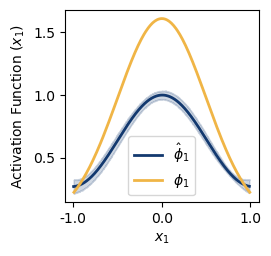

Simplified Symbolic Function: 0.4028511643*sin(2.8578972816*x_2 + 1.611171484) + 0.669441063558713
Simplified Symbolic Function: 0.673061068705692 - 0.3416034579*sin(3.1868383884*x_2 - 8.0044689178)
Simplified Symbolic Function: 0.4330050647*sin(2.8909475803*x_2 + 1.5985039473) + 0.537890098545512
Simplified Symbolic Function: 0.668440726844549 - 0.3621391058*sin(3.6094646454*x_2 - 1.6052299738)
Simplified Symbolic Function: 0.3729394674*sin(2.9948506355*x_2 + 1.5984621048) + 0.680814671740604
Simplified Symbolic Function: 0.3510047793*sin(3.5274083614*x_2 + 1.600549221) + 0.563357997060962
Simplified Symbolic Function: 0.3669427037*sin(3.1194493771*x_2 - 4.7857604027) + 0.616299551650674
Simplified Symbolic Function: 0.603485939105989 - 0.3579690456*sin(3.2635912895*x_2 - 1.5855119228)


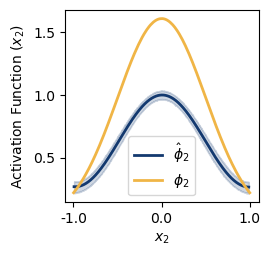

In [6]:
df_summary = {}

df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])

col_clean = []  # used to enable single variable in function
for i in range(df_temp.shape[1] - 1, 0, -1):
    col_clean.append('x_{}'.format(i))

col = []  # initialize feature names
for i in range(1, df_temp.shape[1]):
    col.append('x_{}'.format(i))
col.append('pred')

for var in col[:-1]:  # enumerate all feature names
    
    # get min and max of inputs and outputs
    x_lim_lower, x_lim_upper = 0, 0
    y_lim_lower, y_lim_upper = 0, 0
    
    legend_flag = 0  # only legend one of the predicted results
    
    _, ax = plt.subplots(figsize=(2.5,2.5))
    
    df_lines = pd.DataFrame()
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
            continue  # get only text files with symbolic functions
        
        # get random seed from the file names
        seed = i.split('_')[-1].split('.')[0]
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        try:  # get the corresponding prediction results with the symbolic functions
            df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
        except FileNotFoundError:
            continue  # avoid missing files
        df_pred.columns = col
            
        # print("Symbolic activation function:", res.iloc[-2][0])
        fun_str = res.iloc[-1][0]  # get symbolic functions with 10 digits reserved
        for v in col_clean:
            if v != var:  # set all other variables as 0
                fun_str = fun_str.replace(v, '0')
            else:  # set target feature as variable v
                fun_str = fun_str.replace(v, 'v')
        
        print("Simplified Symbolic Function: {}".format(str(simplify(fun_str)).replace('v', var)))
                
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, 'np.{}'.format(l))
        
        # define the symbolic function using simplified strings
        eval(compile('''def fun(v):
            return {}
        '''.format(fun_str), '<string>', 'exec'))
        
        if legend_flag == 0:
            x_lim_lower, x_lim_upper = (  # update min and max of features
                min(df_pred['{}'.format(var)].min(), x_lim_lower), max(df_pred['{}'.format(var)].max(), x_lim_upper))
        # x_lim_lower, x_lim_upper = -3, 3
        
        # get the smooth symbolic function with grid values
        xs = np.linspace(x_lim_lower, x_lim_upper, 1000)
        fun_pred = [fun(x) for x in xs]
        
        # get label of symbolic functions
        # label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if legend_flag == 0 and (data == 'linear' or data == 'non-linear') else None
        # plot the symbolic functions
        # sns.lineplot(x=xs, y=fun_pred, linewidth=2, color=AAAI_pal['Main Blue'], alpha=(1 - random.random()) ** legend_flag, label=label)
        df_line = pd.DataFrame()
        df_line['x'] = xs
        df_line['y'] = fun_pred
        df_lines = pd.concat([df_lines, df_line])
        
        y_lim_lower, y_lim_upper = (  # update min and max of outputs
            min(min(fun_pred), y_lim_lower), max(max(fun_pred), y_lim_upper))
        
        legend_flag = 1  # only plot the first appearance
        
        df_summary[seed] = df_pred  # store the prediction results
    
    label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if (data == 'linear' or data == 'non-linear') else None
    sns.lineplot(data=df_lines, x='x', y='y', linewidth=2, color=AAAI_pal['Main Blue'], label=label)
    # sns.lineplot(data=df_lines, x='x', y='y', linewidth=2, color=AAAI_pal['Yellow'], label=label)
    
    if data == 'linear':
        # get ground truth if with linear or non-linear experiments
        if var == 'x_1':
            df_pred['fun_true_{}'.format(var)] = df_pred[var]
        else:
            df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    elif data == 'non-linear':
        # get ground truth if with linear or non-linear experiments
        df_pred['fun_true_{}'.format(var)] = np.log(5) * np.exp(-df_pred[var] ** 2 / (2 * 0.5 ** 2))
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    plt.xlabel('$x_{{{}}}$'.format(var.split('_')[-1]))
    plt.ylabel('Activation Function $(x_{{{}}})$'.format(var.split('_')[-1]))
    if data == 'linear' or data == 'non-linear':
        plt.legend()
    
    # marg = min(y_lim_upper, 5) - max(y_lim_lower, -5)
    # plt.ylim([max(y_lim_lower, -5) - 0.1 * marg, min(y_lim_upper, 5) + 0.1 * marg])
    # plt.ylim([-0.6, 1.3])
    # plt.xlim([df_pred['{}'.format(var)].min(), df_pred['{}'.format(var)].max()])
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    if save_plot:
        plt.savefig('../fig/func_{}_{}.png'.format(data, var), bbox_inches='tight', dpi=500, transparent=True)
    
    plt.show()

In [7]:
# data = 'TRACE'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'
    
for i in res_files:
    
    if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
        continue  # get only text files with symbolic functions
    
    # get random seed from the file names
    seed = i.split('_')[-1].split('.')[0]
    # get the corresponding symbolic functions
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    
    try:  # get the corresponding prediction results with the symbolic functions
        df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
    except FileNotFoundError:
        continue  # avoid missing files
    df_pred.columns = col
    
    # fun_str = res.iloc[-3][0]
    fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
    for l in np_lib:  # replace functions in text with numpy functions
        fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
    print('$' + fun_str + '$ \\\\')

$fixing (0,1,0) with \text{sin}, r2=0.9954602718353271$ \\
$fixing (0,1,0) with \text{sin}, r2=0.9967435598373413$ \\
$fixing (0,1,0) with \text{sin}, r2=0.9993829727172852$ \\
$-0.4\text{sin}(2.5x_1 + 4.8) - 0.4\text{sin}(3.6x_2 - 1.6) + 0.2$ \\
$fixing (0,1,0) with \text{sin}, r2=0.9821287393569946$ \\
$fixing (0,1,0) with \text{sin}, r2=0.9818513989448547$ \\
$-0.3\text{sin}(3.6x_1 + 4.8) + 0.4\text{sin}(3.1x_2 - 4.8) + 0.3$ \\
$fixing (0,1,0) with \text{sin}, r2=0.9774623513221741$ \\


In [8]:
for data in ['TRACE', 'colon', 'rdata', 'FRTCS']:
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data or i.split('_')[-1] != '3.txt':
            continue  # get only text files with symbolic functions
        
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        # fun_str = res.iloc[-3][0]
        fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
        print('$' + fun_str + '$ \\\\')

$-1.3\text{sin}(0.5x_2 + 9.3) - 1.6\text{tanh}(0.5x_1 + 1.1) + 0.9$ \\
$0.5\text{tanh}(0.7x_2) + 0.2\text{tanh}(1.4x_1 - 0.6) - 0.2$ \\
$0.1(-x_5 - 0.5)^4 + 1.6\text{tanh}(0.4x_1 + 0.2) - 0.2\text{tanh}(3.9x_2 - 1.1) - 0.3$ \\
$0.6(-x_12 - 0.2)^4 + 0.2(-x_6 - 0.e-1)^2 + 0.2\text{sin}(1.4x_1 + 6.8) - 0.2\text{sin}(1.6x_2 + 5.2) - 0.8\text{sin}(1.2x_4 - 2.6) - 0.2\text{sin}(1.8x_5 - 10.0) - 0.6\text{tanh}(1.2x_3 + 1.3) - 0.5\text{tanh}(2.3x_7 + 2.0) + 0.4\text{tanh}(1.0x_8 + 0.2) - 1.2$ \\
